In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# <b style='color:blue'>Kohonen Self-Organizing Maps</b>

In [46]:
def training(data,alpha,m,seed=42,r=0): 
    global cluster
    cluster=[]
    np.random.seed(seed)
    w = np.random.rand(len(data[1]),m) # initial weight
    
    for iteration in range(100): # 100 iterations(epochs)
        for i in data:
            D = [sum((w[:,a]-i)**2) for a in range(m)]
            w[:,np.argmin(D)] = w[:,np.argmin(D)] + alpha*(i-w[:,np.argmin(D)])
        alpha *= 0.5

    for i in data:
        nilai=[sum((w[:,a]-i)**2) for a in range(m)]
        cluster.append(np.argmin(nilai))

# 1. Mall Customers

In [47]:
data = pd.read_csv('Mall_Customers.csv')
data = data.drop('CustomerID', axis=1)
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


### Pre-Processing

In [48]:
data_num = data.select_dtypes(np.number)
data_cat = data.select_dtypes(exclude = np.number)

In [49]:
scaler = MinMaxScaler()
data_num = pd.DataFrame(scaler.fit_transform(data_num), columns=data_num.columns)
data_num.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,0.019231,0.000000,0.387755
1,0.057692,0.000000,0.816327
2,0.038462,0.008197,0.051020
3,0.096154,0.008197,0.775510
4,0.250000,0.016393,0.397959


In [50]:
data_cat = pd.get_dummies(data_cat, columns=['Gender'])
data_cat.head()

,Gender_Female,Gender_Male
0,0,1
1,0,1
2,1,0
3,1,0
4,1,0


In [51]:
# concat 2 dataframes
data_prepos = pd.concat([data_num,data_cat],axis=1)
data_prepos.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,0.019231,0.000000,0.387755,0,1
1,0.057692,0.000000,0.816327,0,1
2,0.038462,0.008197,0.051020,1,0
3,0.096154,0.008197,0.775510,1,0
4,0.250000,0.016393,0.397959,1,0


In [52]:
data_prepos = data_prepos.to_numpy()
data_prepos

array([[0.01923077, 0.        , 0.3877551 , 0.        , 1.        ],
       [0.05769231, 0.        , 0.81632653, 0.        , 1.        ],
       [0.03846154, 0.00819672, 0.05102041, 1.        , 0.        ],
       [0.09615385, 0.00819672, 0.7755102 , 1.        , 0.        ],
       [0.25      , 0.01639344, 0.39795918, 1.        , 0.        ],
       [0.07692308, 0.01639344, 0.76530612, 1.        , 0.        ],
       [0.32692308, 0.02459016, 0.05102041, 1.        , 0.        ],
       [0.09615385, 0.02459016, 0.94897959, 1.        , 0.        ],
       [0.88461538, 0.03278689, 0.02040816, 0.        , 1.        ],
       [0.23076923, 0.03278689, 0.7244898 , 1.        , 0.        ],
       [0.94230769, 0.03278689, 0.13265306, 0.        , 1.        ],
       [0.32692308, 0.03278689, 1.        , 1.        , 0.        ],
       [0.76923077, 0.04098361, 0.14285714, 1.        , 0.        ],
       [0.11538462, 0.04098361, 0.7755102 , 1.        , 0.        ],
       [0.36538462, 0.04098361, 0.

In [53]:
data_prepos[1]

array([0.05769231, 0.        , 0.81632653, 0.        , 1.        ])

In [54]:
training(data_num.to_numpy(),0.6,2)
# learnig rate = 0.6 & cluster = 2 



bobot akhir =
 [[0.20731817 0.58667576]
 [0.41960914 0.41188813]
 [0.69914172 0.31151119]]


In [55]:
data['cluster']=cluster
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,Male,19,15,39,0
1,Male,21,15,81,0
2,Female,20,16,6,1
3,Female,23,16,77,0
4,Female,31,17,40,0


In [56]:
data['cluster'].value_counts()

1    103
0     97
Name: cluster, dtype: int64

## Visualizing cluster

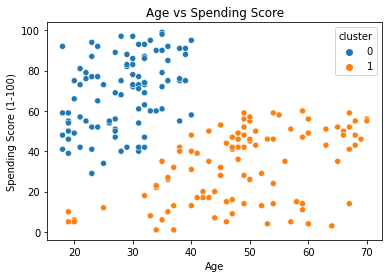

In [57]:
sns.scatterplot(x=data['Age'],y=data['Spending Score (1-100)'],hue=data.cluster)
plt.title('Age vs Spending Score')
plt.show()

# 2. IRIS

In [58]:
df_iris = pd.read_csv('Iris.csv')
df_iris = df_iris.drop('Id', axis=1)
df_iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [59]:
df_iris['Species'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

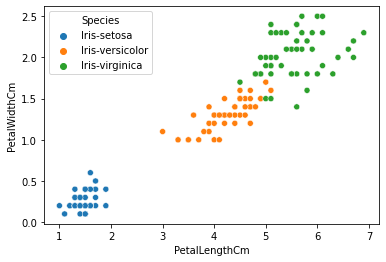

In [60]:
sns.scatterplot(x=df_iris['PetalLengthCm'],y=df_iris['PetalWidthCm'],hue=df_iris.Species)
plt.show()

### Separating labels to be a <b style='color:blue'>Clustering task</b>

In [61]:
df = df_iris.select_dtypes(np.number)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [62]:
# harus discaling, krn kalo tidak akan jadi 1 cluster semua
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


In [63]:
training(df.to_numpy(),0.6,3,40)



bobot akhir =
 [[0.1947412  0.70490485 0.44070828]
 [0.58809999 0.45478654 0.3067203 ]
 [0.0788744  0.79580319 0.58373657]
 [0.06068765 0.83400789 0.56105646]]


In [64]:
df['Species_clus']=cluster
df.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_clus
145,0.666667,0.416667,0.711864,0.916667,1
146,0.555556,0.208333,0.677966,0.750000,2
147,0.611111,0.416667,0.711864,0.791667,1
148,0.527778,0.583333,0.745763,0.916667,1
149,0.444444,0.416667,0.694915,0.708333,2


In [65]:
df['Species_clus'].value_counts()

2    61
0    50
1    39
Name: Species_clus, dtype: int64

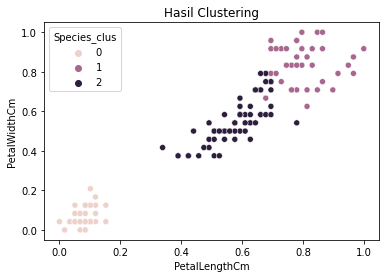

In [66]:
sns.scatterplot(x=df['PetalLengthCm'],y=df['PetalWidthCm'],hue=df.Species_clus)
plt.title('Hasil Clustering')
plt.show()